# Exploratory Data Analysis

Load the data, this data is provided at Kaggle (https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees?resource=download)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnggaPradiktas/productivity-prediction-of-garment-employees/main/data/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

## Attribute Information:
- date : Date in MM-DD-YYYY
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- day : Day of the Week
- team : Associated team number with the instance
- targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- over_time : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time : The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- no_of_style_change : Number of changes in the style of a particular product
- no_of_workers : Number of workers in each team
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [4]:
print('Dataframe has {0} rows and {1} columns'.format(df.shape[0], (df.shape[1])))

Dataframe has 1197 rows and 15 columns


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
print('null value counts at wip column: {}'.format(df['wip'].isnull().sum()))

null value counts at wip column: 506


As we may seen, wip columns has only 691 non-null value. In the columns definition, wip columns is work in progress that includes the number of unfinished items for products. We can make an assumption that null value means that there is no unfinished items during that day, so we can later replace null value with 0

## Data Cleaning - Feature engineering

Process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning

<b>Date Column</b>

We need to convert date (since it is an object) to date format

In [17]:
df['date'] = pd.to_datetime(df['date']) #convert object date to date datatype

<b>Quarter Column</b>

In [8]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

<b>Department Column</b>

In [9]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

We can see typo, it should be sewing instead of sweing. And finishing written twice, might be because of trailing space. We need to fixed this

In [10]:
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

Yup, a trailing space.

Let's fix this. Assign 'finishing ' to 'finishing' and replace sweing with sewing

In [11]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [12]:
df['department'].value_counts().index.to_list()

['sewing', 'finishing']

Now it looks good

<AxesSubplot:ylabel='department'>

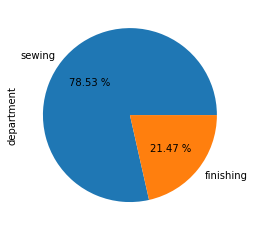

In [13]:
df.department.value_counts().plot.pie(autopct='%.2f %%')

<b>Day Column</b>

In [41]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

Seems like Friday is not a working day

<b> wip Column</b>

Let's replace null with 0, as we mentioned above

In [16]:
df['wip'] = df['wip'].replace(np.nan, 0)

In [18]:
print('null value counts at wip column: {}'.format(df['wip'].isnull().sum()))

null value counts at wip column: 0


null is gone